In [2]:
# prompt: analyse the data

import pandas as pd
try:
    df = pd.read_csv('water.csv')
except FileNotFoundError:
    print("Error: 'water.csv' not found. Please upload your data file or provide the correct file name.")
    df = None  # Set df to None to avoid further errors


if df is not None:
    # Display basic information about the data
    print(df.info())
    print("\n")

    # Display the first 5 rows of the data
    print(df.head())
    print("\n")

    # Display descriptive statistics
    print(df.describe())
    print("\n")

    # Check for missing values
    print(df.isnull().sum())
    print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FOB                                               7815 non-null   object 
 1   Region                                            7815 non-null   object 
 2   Regulating Agency                                 7815 non-null   object 
 3   Water System No                                   7815 non-null   object 
 4   Water System Name                                 7815 non-null   object 
 5   Principal County Served                           7815 non-null   object 
 6   Principal County Served, State                    7607 non-null   object 
 7   Federal Water System Type CODE                    7815 non-null   object 
 8   Federal Water System Type                         7815 non-null   object 
 9   State Water System 

In [24]:
if df is not None:
    # Display basic information about the dataframe as a table
    info = pd.DataFrame(df.info())

    # Print the dataframe info in a structured table-like format
    print(info)
    plt.savefig("info.png")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   FOB                                               7815 non-null   object 
 1   Region                                            7815 non-null   object 
 2   Regulating Agency                                 7815 non-null   object 
 3   Water System No                                   7815 non-null   object 
 4   Water System Name                                 7815 non-null   object 
 5   Principal County Served                           7815 non-null   object 
 6   Principal County Served, State                    7607 non-null   object 
 7   Federal Water System Type CODE                    7815 non-null   object 
 8   Federal Water System Type                         7815 non-null   object 
 9   State Water System 

<Figure size 640x480 with 0 Axes>

                                                  Missing Values  Percentage
FOB                                                            0    0.000000
Region                                                         0    0.000000
Regulating Agency                                              0    0.000000
Water System No                                                0    0.000000
Water System Name                                              0    0.000000
Principal County Served                                        0    0.000000
Principal County Served, State                               208    2.661548
Federal Water System Type CODE                                 0    0.000000
Federal Water System Type                                      0    0.000000
State Water System Type CODE                                   0    0.000000
State Water System Type                                        0    0.000000
Water System Status CODE                                       0    0.000000

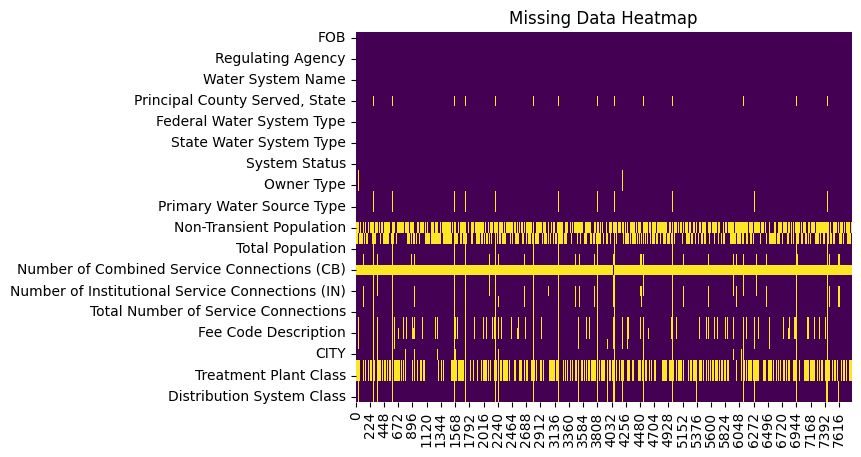

In [28]:
# Checking for missing values in the dataset
missing_data = df.isnull().sum()

# Percentage of missing values for each column
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for missing data summary
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Display missing data summary
print(missing_summary)

# Visual representation of missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap of missing data
sns.heatmap(df.isnull().T, cbar=False, cmap='viridis')

# Title for the heatmap
plt.title("Missing Data Heatmap")

# Rotate the x and y axis labels for better visibility
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.yticks(rotation=0)   # Rotate y-axis labels by 0 degrees (horizontal)

# Save the heatmap as a PNG image
plt.savefig("heatmap.png")

# Display the heatmap
plt.show()


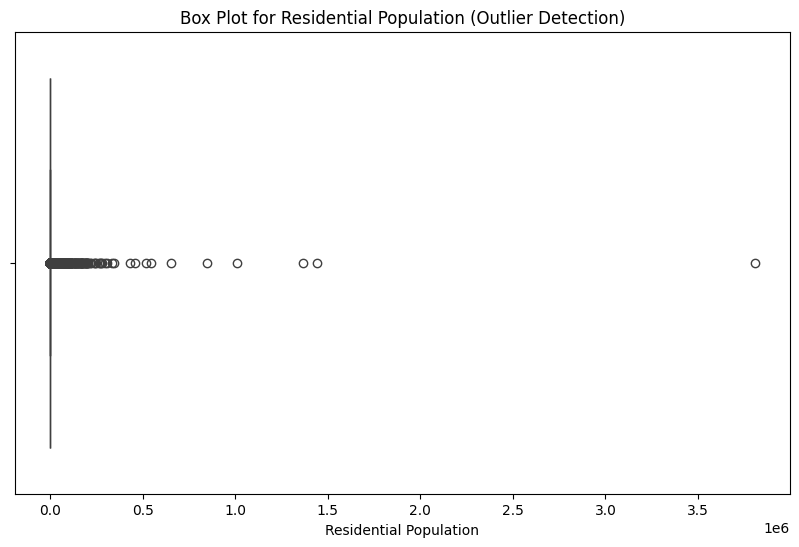

<Figure size 640x480 with 0 Axes>

In [29]:
# Box plots to detect outliers in numeric columns like 'Residential Population'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Residential Population')
plt.title("Box Plot for Residential Population (Outlier Detection)")
plt.show()
plt.savefig("boxplot.png")


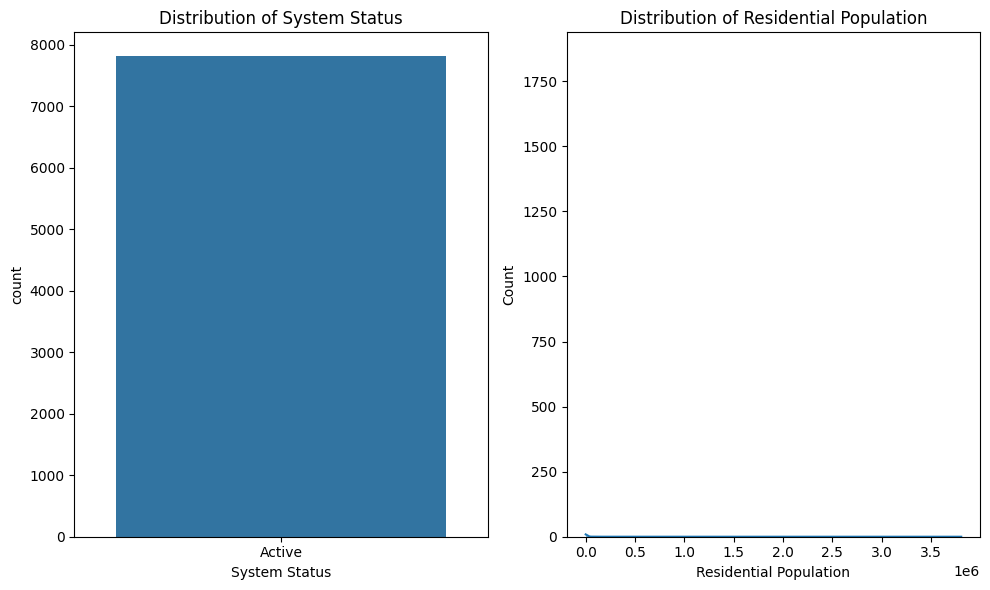

In [10]:
# Plot the distribution of the response variables (System Status and Population Served)
plt.figure(figsize=(10, 6))

# Distribution of System Status
plt.subplot(1, 2, 1)
sns.countplot(x='System Status', data=df)
plt.title("Distribution of System Status")

# Distribution of Residential Population (numeric data, distribution)
plt.subplot(1, 2, 2)
sns.histplot(df['Residential Population'], kde=True)
plt.title("Distribution of Residential Population")

plt.tight_layout()
plt.savefig("distribution.png")
plt.show()


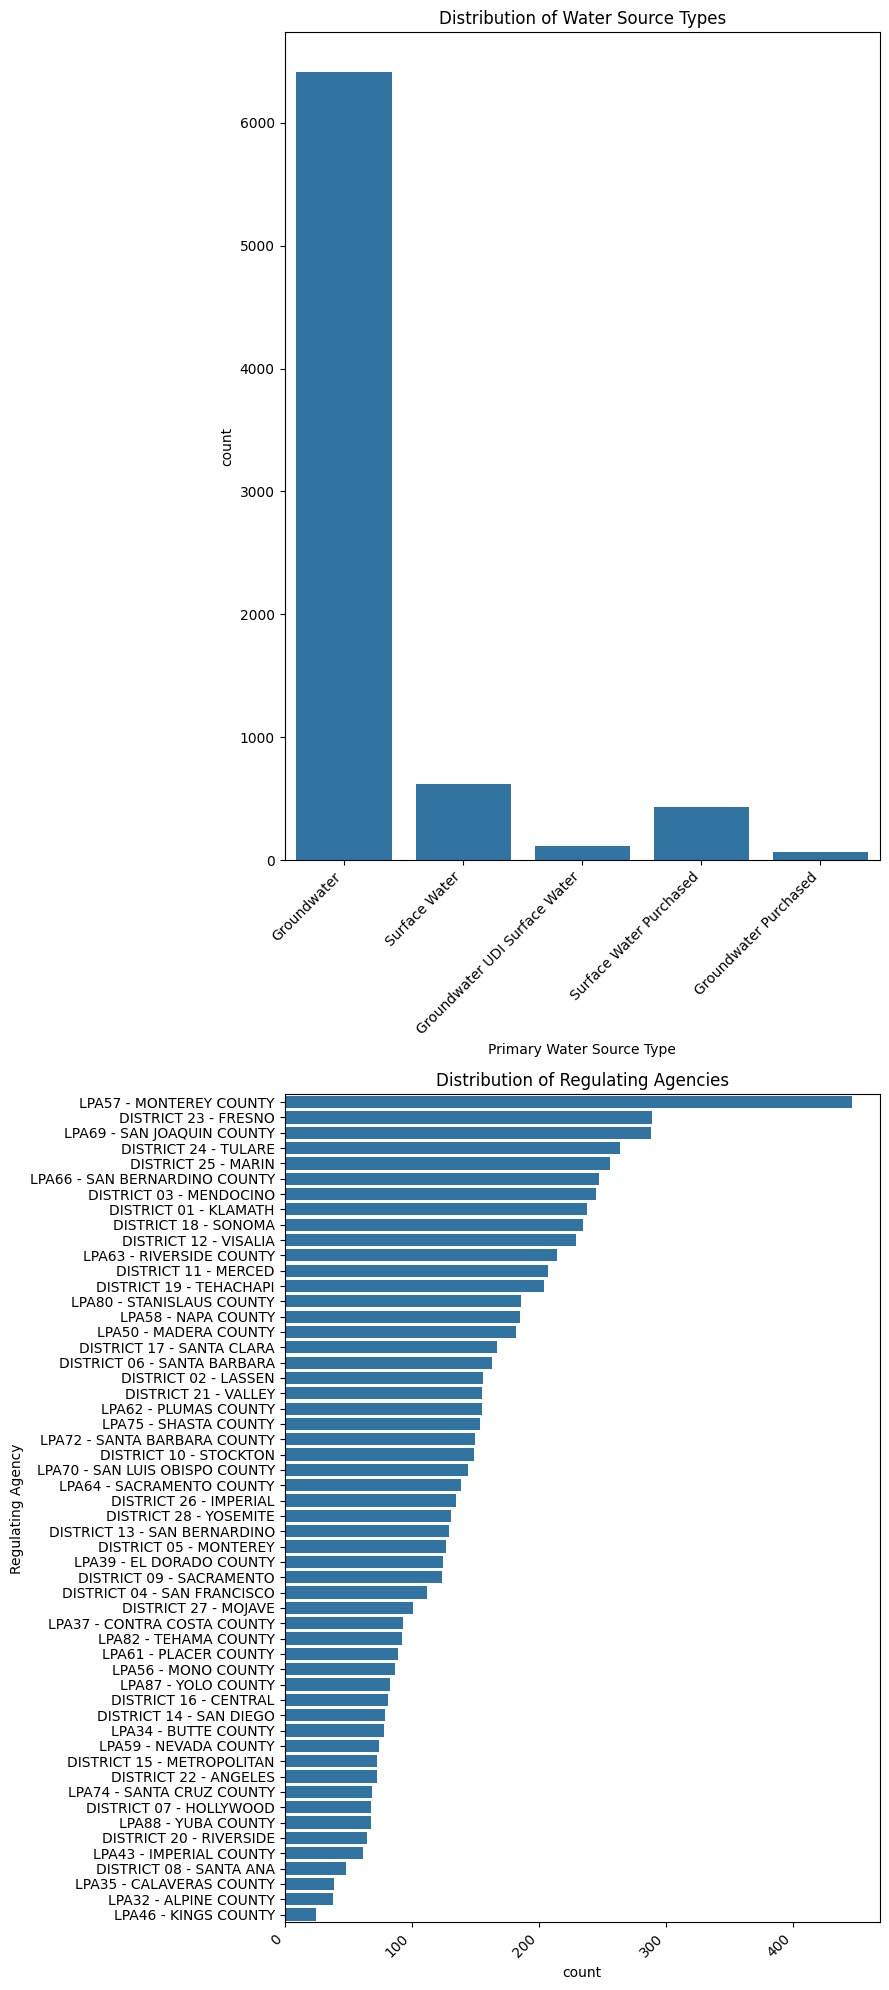

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with a larger height for vertical display
plt.figure(figsize=(9, 20))

# Water Source Type distribution (1st plot)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.countplot(x='Primary Water Source Type', data=df)
plt.title("Distribution of Water Source Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Regulating Agency distribution (2nd plot) with x and y axes swapped
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.countplot(y='Regulating Agency', data=df, order=df['Regulating Agency'].value_counts().index)
plt.title("Distribution of Regulating Agencies")
plt.ylabel('Regulating Agency')  # Label for y-axis
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility

# Tight layout to ensure everything fits properly
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("distribution.png")

# Show the plot
plt.show()


<ipython-input-21-0ce2ddc9856a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Residential Population'].fillna(df['Residential Population'].median(), inplace=True)


count    7.815000e+03
mean     5.065661e+03
std      5.597090e+04
min      1.000000e+00
25%      1.095000e+02
50%      1.095000e+02
75%      1.095000e+02
max      3.806272e+06
Name: Residential Population, dtype: float64


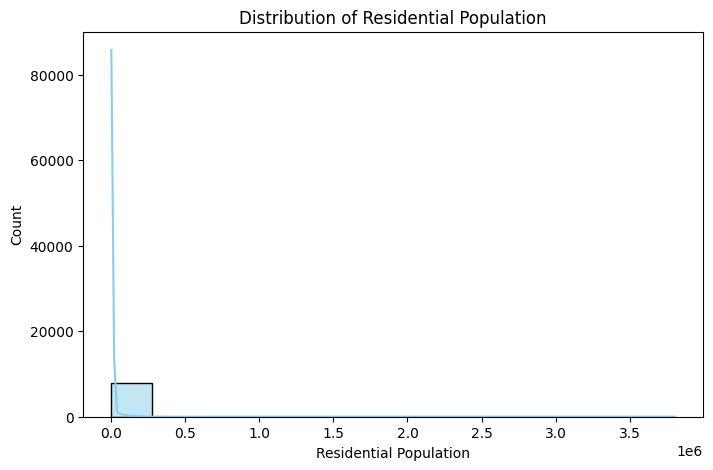

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fill null values in 'Residential Population' with the median (or choose other strategies like mean or dropping rows)
df['Residential Population'].fillna(df['Residential Population'].median(), inplace=True)

# Alternatively, if you want to drop rows with null values, use:
# df = df.dropna(subset=['Residential Population'])

# Statistics for 'Residential Population'
numeric_stats = df['Residential Population'].describe()
print(numeric_stats)

# Visualizing the distribution of Residential Population
plt.figure(figsize=(8, 5))
sns.histplot(df['Residential Population'], kde=True, color='skyblue')
plt.title("Distribution of Residential Population")
plt.show()


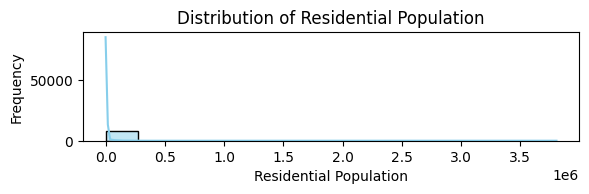

In [31]:
# 1. Histogram for 'Residential Population'
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.histplot(df['Residential Population'], kde=True, color='skyblue')
plt.title("Distribution of Residential Population")
plt.xlabel("Residential Population")
plt.ylabel("Frequency")
plt.savefig("distributions.png")
plt.show()

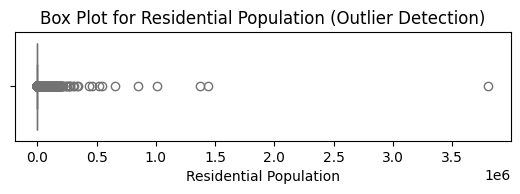

In [32]:
# 2. Box Plot for 'Residential Population' (Outlier Detection)
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
sns.boxplot(data=df, x='Residential Population', color='lightgreen')
plt.title("Box Plot for Residential Population (Outlier Detection)")
plt.xlabel("Residential Population")
plt.savefig("boxplot1.png")
plt.show()

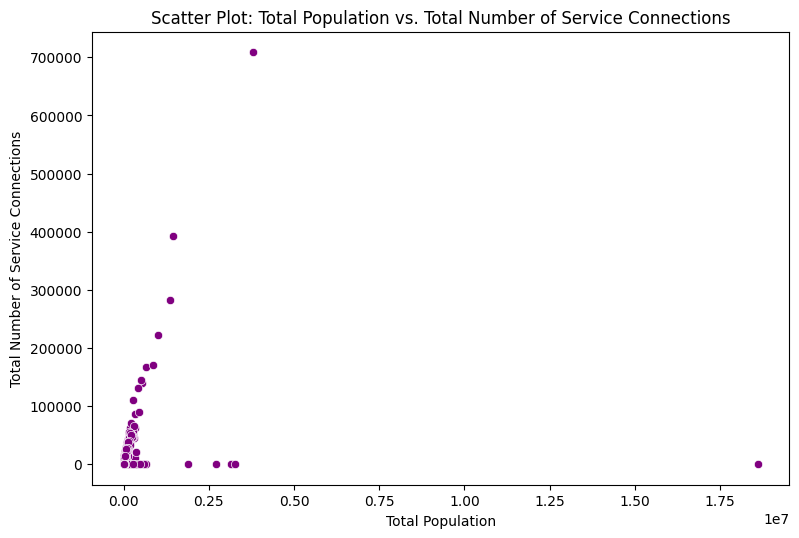

In [34]:
# 3. Scatter Plot between 'Total Population' and 'Number of Service Connections'
plt.figure(figsize=(9, 20))
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
sns.scatterplot(data=df, x='Total Population', y='Total Number of Service Connections', color='purple')
plt.title("Scatter Plot: Total Population vs. Total Number of Service Connections")
plt.xlabel("Total Population")
plt.ylabel("Total Number of Service Connections")
plt.savefig("scatterplot.png")
plt.show()